===============================
TensorFlow - Deep learning approach <br>
===============================
* Author: ANDY MAI
* References from various sources
* Python is used in the entire section
* San Jose - the Capital of Silicon Valley
* July 2017
--------------------------------------------------

## INTRODUCTION TO TENSORFLOW - Section 02
In this section, we will use a dataset of handwriting in TensorFlow API to recognize the number (from 0 to 9) based on humans' hand-writing patterns.

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

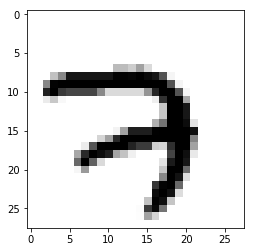

In [4]:
sample = mnist.train.images[0].reshape(28,28)
plt.imshow(sample,cmap='Greys')

In [5]:
# Parameters
learning_rate = 0.001
training_epochs = 30
batch_size = 100

In [6]:
# Network Parameters
n_hidden_1 = 256
n_hidden_2 = 256
n_hidden_3 = 256
n_hidden_4 = 256
n_hidden_5 = 256
n_hidden_6 = 256
n_input = 784
n_classes = 10 # number from 0 to 9
n_samples = mnist.train.num_examples

### x and y are placeholders, x will get values from dataset of hand-writing patterns, y will be the target to predict.
* x will be presented in pixel matrices of every single pattern.
* y is type of integer ==> The true value of matrix pattern.

In [7]:
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder('float', [None, n_classes])

### Create multilayers of perceptron to enhance the accuracy of training model
<i> In this example, I created 6 layers of perceptron </i>

In [8]:
def multilayer_perceptron(x, weights, biases):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['h4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    layer_5 = tf.add(tf.matmul(layer_4, weights['h5']), biases['b5'])
    layer_5 = tf.nn.relu(layer_5)
    
    layer_6 = tf.add(tf.matmul(layer_5, weights['h6']), biases['b6'])
    layer_6 = tf.nn.relu(layer_6)
    
    out_layer = tf.matmul(layer_6, weights['out']) + biases['out']
    return out_layer

In [9]:
weights = {
    'h1':tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h4':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h5':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h6':tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2, n_classes])),
}

In [10]:
biases = {
    'b1':tf.Variable(tf.random_normal([n_hidden_1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_2])),
    'b3':tf.Variable(tf.random_normal([n_hidden_2])),
    'b4':tf.Variable(tf.random_normal([n_hidden_2])),
    'b5':tf.Variable(tf.random_normal([n_hidden_2])),
    'b6':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}

In [11]:
pred = multilayer_perceptron(x, weights, biases)

### Optimizer function:
It is used to learn from previous errors and improve for the next run.<br>
In this section, I use AdamOptimizer (simply known as f(x): max(x,0) ). You can try with Gradient Descent.

In [12]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [13]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [15]:
sess = tf.InteractiveSession()

In [16]:
sess.run(init)

In [17]:
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=1448966.6982
Epoch: 2 cost=337748.5427
Epoch: 3 cost=193454.2433
Epoch: 4 cost=126554.6544
Epoch: 5 cost=85820.5650
Epoch: 6 cost=60511.4799
Epoch: 7 cost=43254.6289
Epoch: 8 cost=32540.8092
Epoch: 9 cost=26925.9057
Epoch: 10 cost=21722.1641
Epoch: 11 cost=17574.9825
Epoch: 12 cost=14941.5152
Epoch: 13 cost=15266.3407
Epoch: 14 cost=15184.7089
Epoch: 15 cost=12931.4362
Epoch: 16 cost=10247.9225
Epoch: 17 cost=8563.0072
Epoch: 18 cost=11386.4427
Epoch: 19 cost=10508.7298
Epoch: 20 cost=8197.7757
Epoch: 21 cost=8649.7464
Epoch: 22 cost=9852.1795
Epoch: 23 cost=6902.7628
Epoch: 24 cost=6426.8704
Epoch: 25 cost=6539.5492
Epoch: 26 cost=7394.3696
Epoch: 27 cost=6782.1907
Epoch: 28 cost=7299.0677
Epoch: 29 cost=4636.4605
Epoch: 30 cost=7087.1744
Model has completed 30 Epochs of Training


In [18]:
corr_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [19]:
print(corr_pred[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [20]:
corr_pred = tf.cast(corr_pred, 'float')

In [21]:
print(corr_pred[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


In [22]:
accurary = tf.reduce_mean(corr_pred)

In [23]:
print("Accuracy:", accurary.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.951
